## Задание 1
### Задание 1.1. Считать данные.

In [2]:
import pandas as pd
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задание 1.2. Изучите стоимость недвижимости.

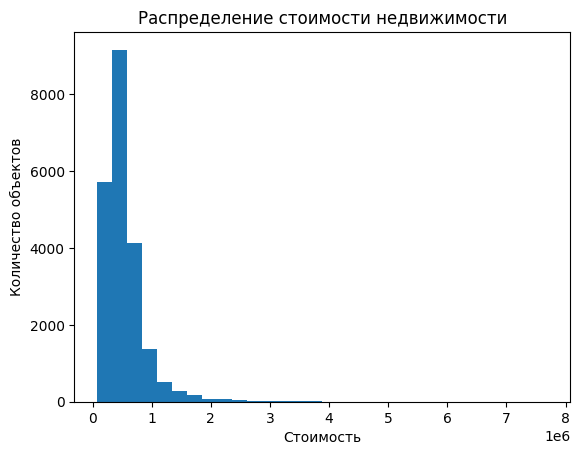

In [5]:
import matplotlib.pyplot as plt
plt.hist(house_data['price'], bins=30)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество объектов');

Распределение стоимости объектов недвижимости показывает, что основная доля объектов недвижимости имеет стоимость до 1 млн. 

### 1.3. Изучите распределение квадратуры жилой площади. 

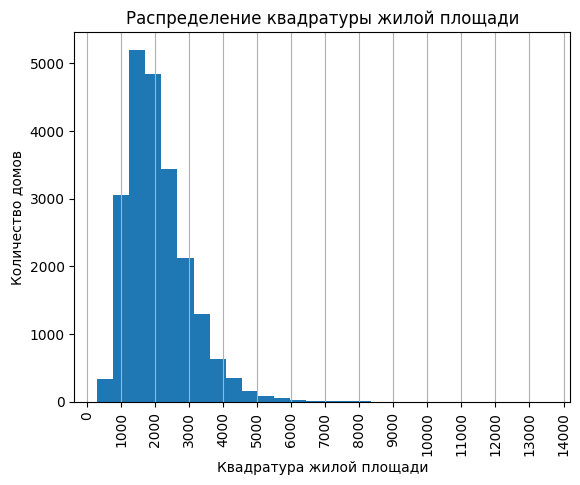

In [76]:
plt.hist(house_data['sqft_living'], bins=28)
plt.title('Распределение квадратуры жилой площади')
plt.grid(axis = 'x')
plt.xticks(ticks=[i * 1000 for i in range(15)], rotation=90)
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество домов');

Распределение квадратуры жилой площади показывает, что основная масса домов имеет жилую площадь в диапазоне [800, 3000].

### Задание 1.4. Изучите распределение года постройки.

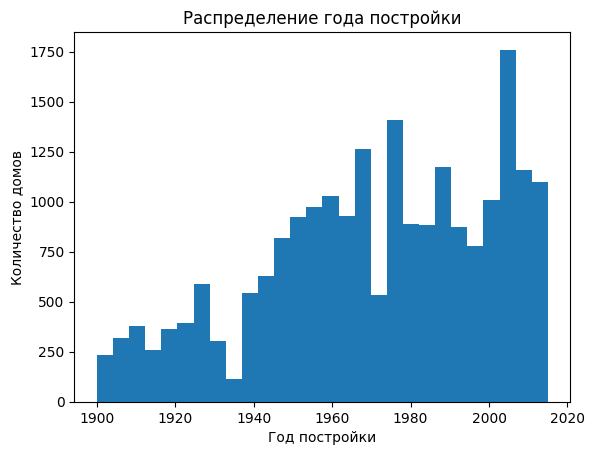

In [80]:
plt.hist(house_data['yr_built'], bins=28)
plt.title('Распределение года постройки')
# plt.grid(axis = 'x')
# plt.xticks(ticks=[i * 1000 for i in range(15)], rotation=90)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Распределение года постройки показывает, что строительство домов происходило достаточно неравномерно и основная масса домов построена в период с 1940 по 2015 годы.

## Задание 2. Постройте график и сделайте выводы.
### Задание 2.1. Изучите распределение домов от наличия вида на набережную.

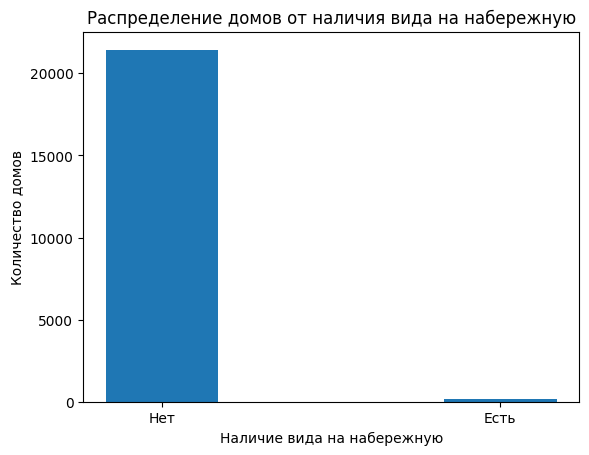

In [83]:
plt.hist(house_data['waterfront'], bins=4, align = 'left')
plt.title('Распределение домов от наличия вида на набережную')
plt.xticks(ticks=[0, 0.75], labels=['Нет', 'Есть'])
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Количество домов');

Распределение домов от наличия вида на набережную показывает, что преобладающее количество домов не имеют вида на набережную.

### 2.2. Изучите распределение этажей домов.

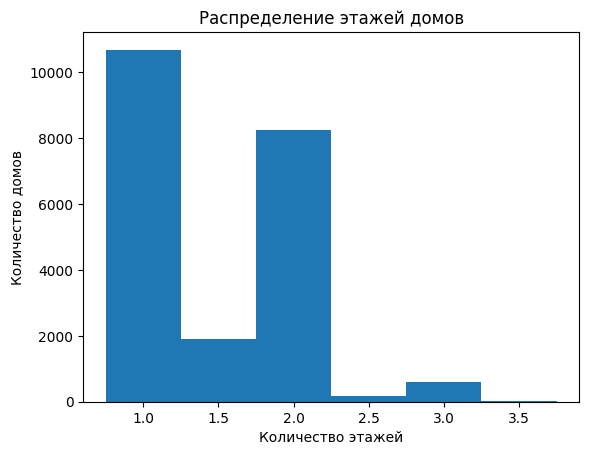

In [85]:
plt.hist(house_data['floors'], bins=6, range = (1,4), align = 'left')
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Распределение этажей домов показывает, что преобладающее количество домов - одноэтажные и двухэтажные.

### Задание 2.3. Изучите распределение состояния домов.

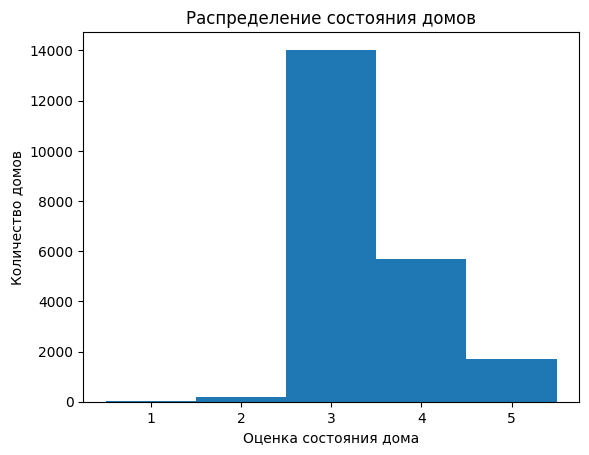

In [90]:
plt.hist(house_data['condition'], bins=5, range = (1,6), align = 'left')
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество домов');

Распределение состояния домов показывает, что наибольшее количество домов имеет оценку 3, а преобладающее количество домов имеет оценку состояния не менее 3.

## Задание 3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока, дополните каждый график письменными выводами и наблюдениями.

Для выделения характеристик, которые влияют на стоимость недвижимости, построим матрицу корреляции.

In [135]:
# исключим из матрицы нечисленные параметры, id и парамаетры, привязанные к 2015 году
corr_mx = house_data.drop(columns=['id', 'sqft_living15', 'sqft_lot15']).corr(numeric_only=True).round(1)
# оставим только строки с параметрами, которые имеют коэффициент корреляции с ценой более 0.3
corr_mx = corr_mx[abs(corr_mx['price']) > 0.3]
# удалим столбцы с параметрами, которые имеют коэффициент корреляции с ценой 0.3 и менее
corr_mx = corr_mx.drop(columns=[i for i in corr_mx.columns.values if abs(corr_mx.loc['price', i]) <= 0.3])


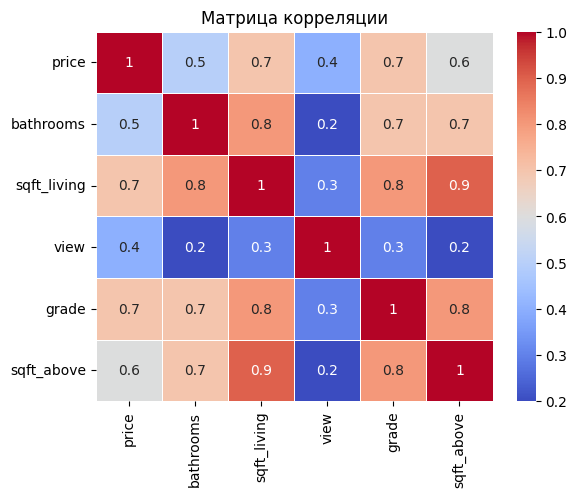

In [138]:
import seaborn as sns
plt.title('Матрица корреляции')
sns.heatmap(corr_mx,  annot=True, linewidths=.5, cmap='coolwarm');

Полученная матрица корреляции показывает, что устойчивая прямая линейная зависимость цены наблюдается по отношению:

`1)` к жилой площади (коэффициент корреляции 0.7), 

`2)` рейтингу (0.7), 

`3)` площади дома без подвала (0.6), 

`4)` количеству ванных комнат (0.5),

`5)` виду из дома (0.4). 

### 3.1. Зависимость цены от размера жилой площади.

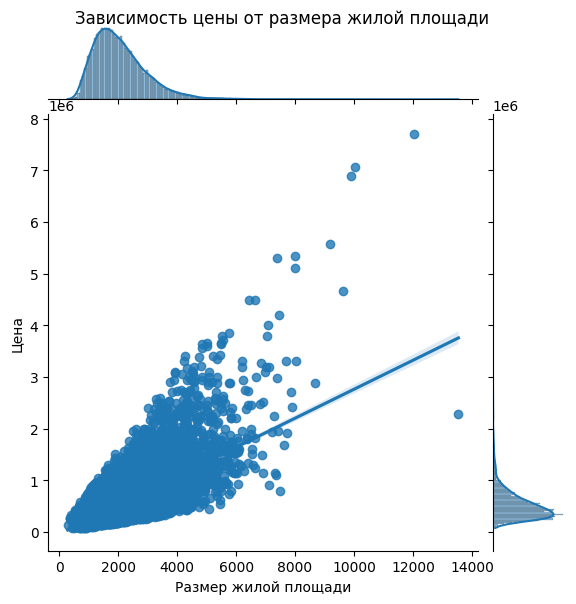

In [153]:
sns.jointplot(x=house_data['sqft_living'], y=house_data['price'], kind='reg')
plt.suptitle('Зависимость цены от размера жилой площади', y=1)
plt.xlabel('Размер жилой площади')
plt.ylabel('Цена');

На графике явно наблюдается прямая линейная зависимость цены от размера жилой площади.

### 3.2. Зависимость цены от рейтинга дома.

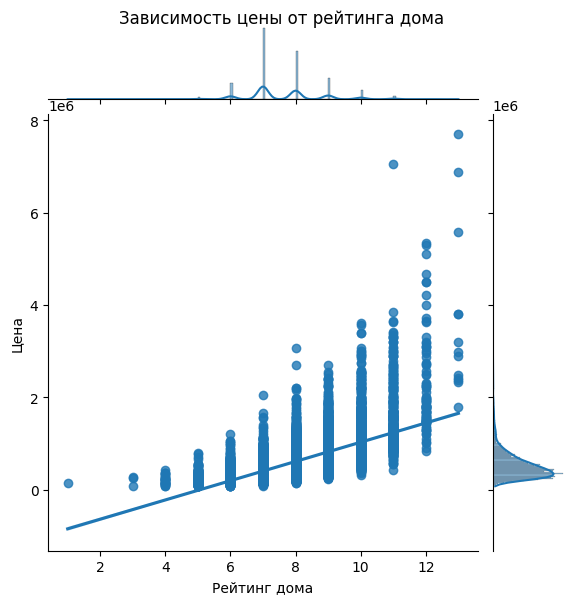

In [156]:
sns.jointplot(x=house_data['grade'], y=house_data['price'], kind='reg')
plt.suptitle('Зависимость цены от рейтинга дома', y=1)
plt.xlabel('Рейтинг дома')
plt.ylabel('Цена');

График демонстрирует прямую линейную зависимость цены от рейтинга дома.

### 3.3. Зависимость цены от площади дома без подвала.

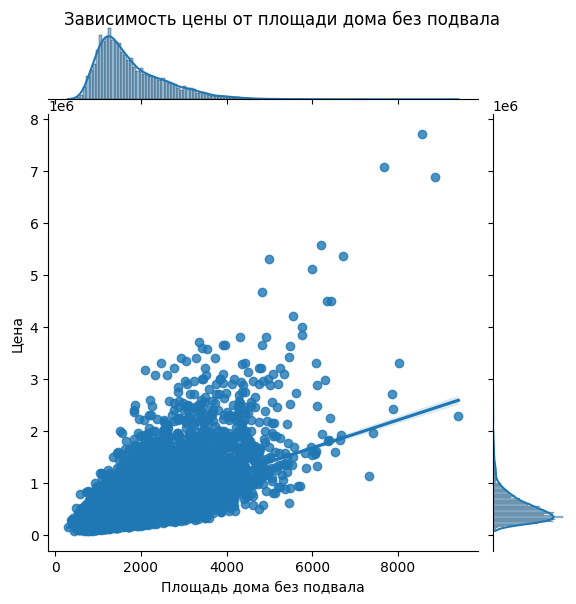

In [157]:
sns.jointplot(x=house_data['sqft_above'], y=house_data['price'], kind='reg')
plt.suptitle('Зависимость цены от площади дома без подвала', y=1)
plt.xlabel('Площадь дома без подвала')
plt.ylabel('Цена');

График показывает прямую линейную зависимость цены от размера площади дома без подвала.

### 3.4. Зависимость цены от количества ванных комнат.

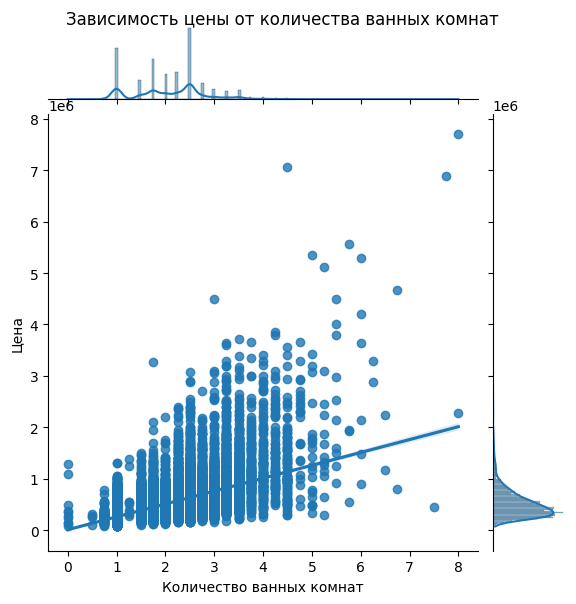

In [162]:
sns.jointplot(x=house_data['bathrooms'], y=house_data['price'], kind='reg')
plt.suptitle('Зависимость цены от количества ванных комнат', y=1)
plt.xlabel('Количество ванных комнат')
plt.ylabel('Цена');

График выражает прямую линейную зависимость цены от количества ванных комнат.

### 3.5. Зависимость цены от вида из дома.

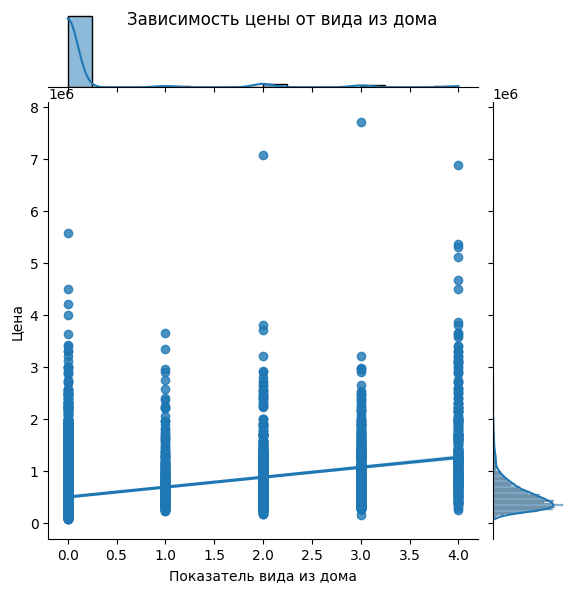

In [161]:
sns.jointplot(x=house_data['view'], y=house_data['price'], kind='reg')
plt.suptitle('Зависимость цены от вида из дома')
plt.xlabel('Показатель вида из дома')
plt.ylabel('Цена');

На графике наблюдается незначительная прямая линейная зависимость цены от вида из дома.